In this notebook we we'll build a model to classifie 10 different animals.


## 1. Download the dataset and unzip it


In [1]:
try:
    import os
    os.environ['KAGGLE_CONFIG_DIR'] = 'animals_classification'
    !kaggle datasets download -d alessiocorrado99/animals10
except:
    !pip install kaggle
    import os
    os.environ['KAGGLE_CONFIG_DIR'] = 'animals_classification'
    !kaggle datasets download -d alessiocorrado99/animals10
    

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile

# Create a function that unzip the zip file
def unzip_data(file_path, save_path):
    """
        The function we unzip the data to a specifice directory
        
        Args:
            file_path (str): the file that will be unziped
            save_path (str): the file that the file will be unziped and saved
            
        Return: None
    """
    zip_ref = zipfile.ZipFile(file_path, 'r')
    zip_ref.extractall(save_path)
    zip_ref.close()



In [3]:
# Change your paths propertly to unzip the data.
file_path = 'C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/animals10.zip'
save_path = "C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/"

unzip_data(file_path = file_path, save_path = save_path)
'''
if os.path.exists(save_path):
    print(f"[INFO] The file has already unziped, so we move forward")
else:
    print(f"[INFO] The files has not been unziped, we start uzniping now")
    # Unzip the files
    unzip_data(file_path = file_path, save_path = save_path)'''

'\nif os.path.exists(save_path):\n    print(f"[INFO] The file has already unziped, so we move forward")\nelse:\n    print(f"[INFO] The files has not been unziped, we start uzniping now")\n    # Unzip the files\n    unzip_data(file_path = file_path, save_path = save_path)'

In [4]:
# Create a function that shows how many images we have in each folder of the unzip file
from os.path import dirname
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [5]:
walk_through_dir(save_path ) 

There are 5 directories and 8 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/
There are 5 directories and 7 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git
There are 0 directories and 14 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\hooks
There are 0 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\info
There are 1 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs
There are 2 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs
There are 0 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs\heads
There are 1 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs\remotes
There are 0 directories and 2 images in C:/Users/dimit/

## 2. Turn the data into appropriate format.
We must change how the directories is.
1. First of all change the names of the folders and convert them into the english language.
2. Create 1 folder and inside that folder create 3 directories (training, validation and testing sets)
3. In each of this 3 subsets, create a directory and save images from every category. 

### 2.1. Convert the names of the directories into English.

In [6]:
translate = {"cane": "dog", 
             "cavallo": "horse", 
             "elefante": "elephant", 
             "farfalla": "butterfly", 
             "gallina": "chicken",
             "gatto": "cat", 
             "mucca": "cow", 
             "pecora": "sheep", 
             "ragno" : "spider",
             "scoiattolo": "squirrel", 
            }

In [7]:
#Create a function that translate the names from Italian to english
def change_names(target_dir, old_name, new_name):
    """
    Change the folder name from old_name to the new_name
    
    Args:
        target_dir (str): The directory where the folder are located
        old_name (str): The current name of the folder
        new_name (str): The future name of the folder
    
    Return: 
        None
    """
    # Go to the target directory but first check if the directory exists. 
    if os.path.exists(target_dir):
        os.chdir(target_dir)
    else: 
        print(f"Target directory does not exist.")
    
    try:
        # Check if the folder exist.
        if os.path.exists(old_name):
            os.rename(old_name, new_name)
            print(f"Folder {old_name} rename to {new_name}")
        else:
            print(f"The folder {old_name} doesn't exist.")    
    except Exception as e:
        print(f"An error occured: {e}")

In [12]:
# Apply the function to chagne the names inside the located folder
'''for old_name, new_name in zip(old_names, new_names):
    change_names(target_directory, old_name, new_name)'''

for old_name, new_name in translate.items():
    change_names(save_path + '/raw-img', old_name, new_name)

Folder cane rename to dog
Folder cavallo rename to horse
Folder elefante rename to elephant
Folder farfalla rename to butterfly
Folder gallina rename to chicken
Folder gatto rename to cat
Folder mucca rename to cow
Folder pecora rename to sheep
Folder ragno rename to spider
Folder scoiattolo rename to squirrel


In [13]:
# Check if the directories had been renamed.
walk_through_dir(save_path) 

There are 5 directories and 8 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/
There are 5 directories and 7 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git
There are 0 directories and 14 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\hooks
There are 0 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\info
There are 1 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs
There are 2 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs
There are 0 directories and 1 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs\heads
There are 1 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/.git\logs\refs\remotes
There are 0 directories and 2 images in C:/Users/dimit/

### Visualize an image from each of the new directories to ensure that we named it correct.

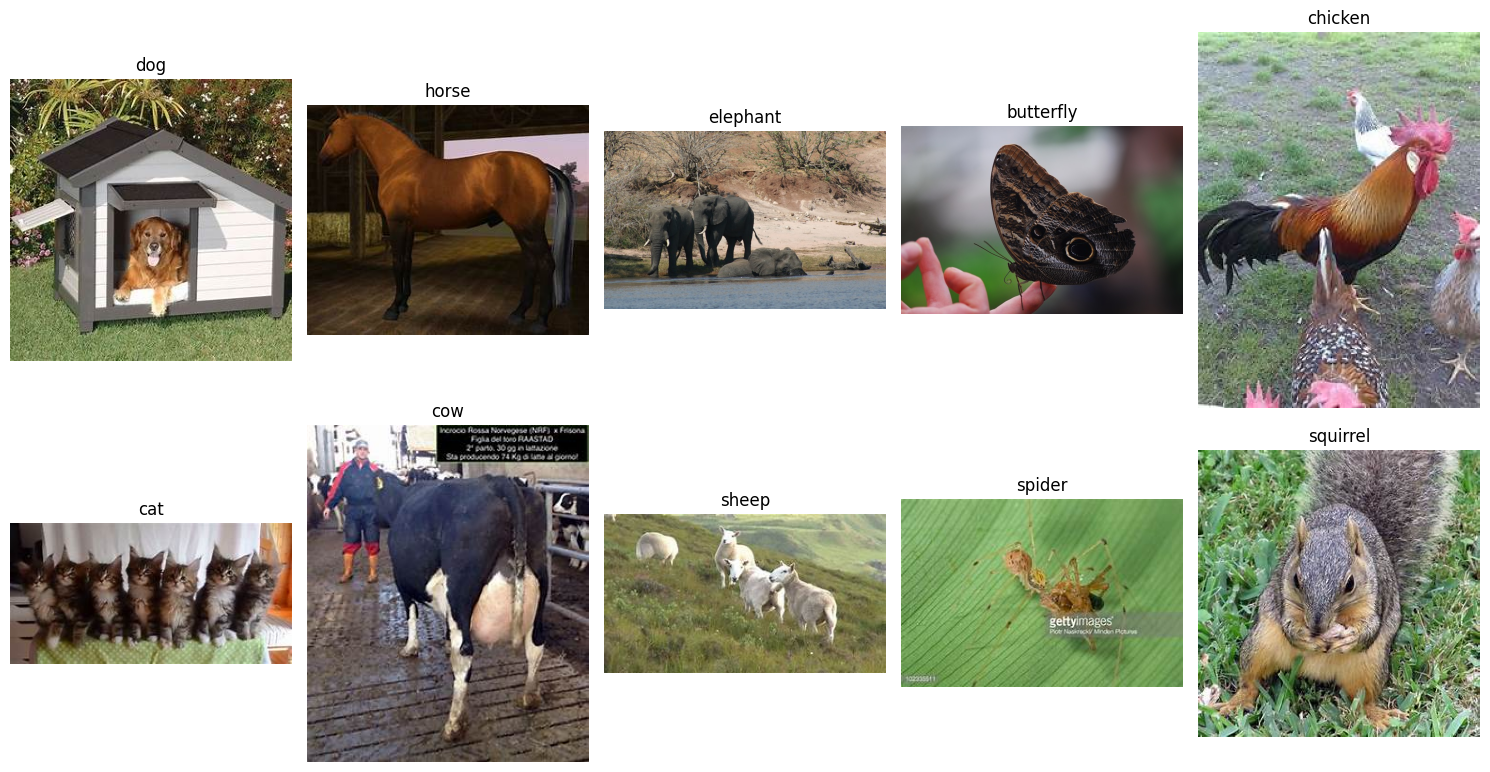

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
classes = [animal for animal in translate.values()]

def view_random_images_from_classes(target_dir):
    """
    The function selects a random image for every class and plot it.
    
    Args:
        target_dir: The directory that the classes are located.
        
    Return:
        Images for every class.
    """
    # Get all the class names (folders) in the target directory
   # classes = [cls for cls in os.listdir(target_dir) if os.path.isdir(os.path.join(target_dir, cls))]
    
    # Set up a figure with 2 rows and 5 columns
    num_classes = len(classes)
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))  # 2 rows, 5 columns
    
    # Flatten axes for easier indexing if needed
    axes = axes.flatten()
    
    # Loop through classes and display a random image in each subplot
    for i, target_class in enumerate(classes):
        target_folder = os.path.join(target_dir, target_class)
        
        # Randomly select an image from the class folder
        random_image = random.choice(os.listdir(target_folder))
        
        # Load and display the image
        img = mpimg.imread(os.path.join(target_folder, random_image))
        axes[i].imshow(img)
        axes[i].set_title(target_class)
        axes[i].axis('off')
    
    # Turn off unused subplots if there are fewer than 10 classes
    for j in range(num_classes, 10):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
view_random_images_from_classes(target_dir=save_path+ '/raw-img')


##  3. Create 3 different dataset for modeling.

### 3.1 Create a new directory to store the transformed dataset called transformed_dataset.
In this directory we will create 3 subdirectories (train, test and validation).

In each of this 3 we will create a folder for each animal.

In [16]:
# The following function that creates a folder
def create_folder(directory_path ,folder_name = None):
    """
    The function create a directory inside a given directory.
    
    Args:
        directory_path (str): the path that the file will be created
        folder_name (str) : The name of the folder.
    """
    
    # Check if the directory path exists
    if os.path.exists(directory_path):
        # if the path exists then go to this directory
        os.chdir(directory_path)
        try:
            os.mkdir(folder_name)
            print(f"[INFO] The folder '{folder_name}' creates succesfully")
        except FileExistsError:
            print(f"[INFO] The folder {directory_path+'/'+folder_name} you want to create has already exists.")
    else: 
        print(f"[INFO] The directory {directory_path} doesn't exist")

First of all let's create the directory that our transformed dataset will be stored.

In [18]:
# Create the directory that the file will be created.
dir_path = "C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification"

# Apply the function and create 3 directories
# The first directory will have 50 images for training and 50 for testing
create_folder(directory_path=dir_path, folder_name = 'transformed_dataset_50_images')

# The second directory will have 100 images for training and 100 for testing
create_folder(directory_path = dir_path, folder_name = 'transformed_dataset_100_images')

# the third directory will have 25 images for training and 25 for testing.
create_folder(directory_path = dir_path, folder_name = 'transformed_dataset_25_images')


[INFO] The folder C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_50_images you want to create has already exists.
[INFO] The folder C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_100_images you want to create has already exists.
[INFO] The folder C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images you want to create has already exists.


### 3.2 We will create train and validation sets for each of those datasets.

In [20]:
# List of the new directories that will be create in the new transformed_dataset
sets = ['train','validation']

# Create a dictionary of datasets that describes the name and the number of images.
datasets = {'transformed_dataset_25_images' : 25, 
            'transformed_dataset_50_images' : 50,
            'transformed_dataset_100_images' : 100}

# Create the path that the train,validation and test sets will be located.
new_dir_path = dir_path + '/' + 'transformed_dataset_20_percent'

# Create the train, validation  set and inside them create folder for each animal

# Loop through every dataset
for dataset in datasets.keys():
    new_dir_path = dir_path + '/' + dataset
    # Loop through the different sets.
    for subset in sets:
        create_folder(directory_path = new_dir_path, folder_name = subset)
        
        # Create a folder for each animal
        for animal in classes:
            create_folder(directory_path= new_dir_path+ '/' + subset,
                         folder_name = animal)


[INFO] The folder 'train' creates succesfully
[INFO] The folder 'dog' creates succesfully
[INFO] The folder 'horse' creates succesfully
[INFO] The folder 'elephant' creates succesfully
[INFO] The folder 'butterfly' creates succesfully
[INFO] The folder 'chicken' creates succesfully
[INFO] The folder 'cat' creates succesfully
[INFO] The folder 'cow' creates succesfully
[INFO] The folder 'sheep' creates succesfully
[INFO] The folder 'spider' creates succesfully
[INFO] The folder 'squirrel' creates succesfully
[INFO] The folder 'validation' creates succesfully
[INFO] The folder 'dog' creates succesfully
[INFO] The folder 'horse' creates succesfully
[INFO] The folder 'elephant' creates succesfully
[INFO] The folder 'butterfly' creates succesfully
[INFO] The folder 'chicken' creates succesfully
[INFO] The folder 'cat' creates succesfully
[INFO] The folder 'cow' creates succesfully
[INFO] The folder 'sheep' creates succesfully
[INFO] The folder 'spider' creates succesfully
[INFO] The folder 

### 3.3 Create a function that moves images to train and validation sets.

In [21]:
import os
import shutil
import random

random.seed(42)
def copy_images(source_dir, destination_dir, num_images):
    """
    Copies a specified number of images from the source directory to the destination directory.
    
    Args:
        - source_dir (str): Path to the source directory containing the images.
        - destination_dir (str): Path to the destination directory.
        - num_images (int): Number of images to copy.
    """
    # Get a list of all files in the source directory
    all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]
    
    # Shuffle and pick the specified number of images
    selected_files = random.sample(all_files, min(num_images, len(all_files)))
    
    # Ensure the destination directory exists
    os.makedirs(destination_dir, exist_ok=True)
    
    # Copy each selected file to the destination directory
    for file_name in selected_files:
        source_path = os.path.join(source_dir, file_name)
        destination_path = os.path.join(destination_dir, file_name)
        shutil.move(source_path, destination_path)
        print(f"Copied {file_name} to {destination_dir}")
    
    print(f"\nSuccessfully copied {len(selected_files)} image(s) to {destination_dir}.")

# Example usage
#copy_images(dir_path +'/raw-img/cat', dir_path +'/transformed_dataset1/test/cat', 200)


In [23]:
from tqdm.auto import tqdm
# Directory that our model will take the images
directory_path = dir_path + "/raw-img"

# Start the loop to move images into the tree different datasets.

for dataset, number_of_img in tqdm(datasets.items()):
    print(f"[INFO] I'm working with the {dataset} that consists {number_of_img} images\n")
    
    # Create a variable to store the dataset that the images will be moved.
    moved_dataset = dir_path + '/' + dataset
    
    # Loop through the different animals to create the train and valid sets.
    for animal in classes:
        
        # Create the source dir 
        source_dir_loop = directory_path + f"/{animal}"
        
        #Loop through the different sets
        for set in sets:
            
            # Create the destination directory for loop
            destination_dir_loop = moved_dataset + f"/{set}/{animal}"
            
            copy_images(source_dir = source_dir_loop,
                       destination_dir= destination_dir_loop,
                       num_images = number_of_img)

  0%|          | 0/3 [00:00<?, ?it/s]

[INFO] I'm working with the transformed_dataset_25_images that consists 25 images

Copied OIP-ae3kX0tRi46YeGr636ExkgHaHa.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copied OIP-1TAVqN6lx6ytUZozD40uZAHaHa.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copied OIP-JLGPZd5C0lAPr4uvliRDTAHaLL.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copied OIP-hrCC37tXuPnVhtTfnX2tBgHaE_.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copied OIP-glP_df2geLAzylRLlK6RvQHaIt.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copied OIP-btYa7yMPdM7v6lbe_1dLBwHaF-.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images/train/dog
Copie

### 3.4 Ensure that the datasets has the number of images that you want.

In [ ]:
for dataset in datasets.keys():
    walk_through_dir(dir_path + '/' + dataset)

There are 2 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images
There are 10 directories and 0 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images\train
There are 0 directories and 25 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images\train\butterfly
There are 0 directories and 25 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images\train\cat
There are 0 directories and 25 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images\train\chicken
There are 0 directories and 25 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_dataset_25_images\train\cow
There are 0 directories and 25 images in C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/transformed_data

In [ ]:
'''from tqdm.auto import tqdm


for animal in tqdm(classes):
    print(f"\nLet's start creating the desired test with '{animal}'.\n")
    for my_set in sets:
        print(f"----------We currently working with '{my_set}'----------")
        
        # Create the source_dir 
        source_dir_loop = directory_path + f'/{animal}'
        
        # Create the destination directory for the loop
        destination_dir_loop = moved_dir_path + f'/{my_set}/{animal}'
        
        
        if my_set == 'train':
            copy_images(source_dir = source_dir_loop,
                        destination_dir = destination_dir_loop,
                        num_images = len(os.listdir(directory_path+f'/{animal}')) - 400)
        else:
            # Use the function to copy images.
            copy_images(source_dir = source_dir_loop,
                        destination_dir = destination_dir_loop,
                        num_images = 25)'''

In [ ]:
print(directory_path)

C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/raw-img


### 3.5 Create the same dataset for testing the models.
When we start the modeling, we will eventually check the accuracy of the model in the testing set.

So, we want the testing set to be fixed.

Create the testing set in the folders project and then copy it in every dataset.


In [24]:
# Create the path that the photos currently are
directory_path = dir_path + '/raw-img'

# Create the path that the images will be moved.
moved_dir_path = dir_path +'/test'

# Loop through different animals to create the test set.
for animal in tqdm(classes):
    
    # Create the source_dir 
    source_dir_loop = directory_path + f'/{animal}'

    # Create the destination directory for the loop
    destination_dir_loop = moved_dir_path + f'/{animal}'
    
    # if the destination dir loop exists, means that we already have the testing set
    if os.path.exists(destination_dir_loop):
        print(f"[INFO] The {destination_dir_loop} already exists.")
        pass
        
    else:
        print(f"[INFO] We start moving photos to create the test set.")
        copy_images(source_dir = source_dir_loop,
                    destination_dir = destination_dir_loop,
                    num_images = 50)
        


  0%|          | 0/10 [00:00<?, ?it/s]

[INFO] We start moving photos to create the test set.
Copied OIP-0977rkGtQ_PPflLXiMRRYAHaFM.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP--Zih5aJ_hAwXfs91iq3dZAHaJH.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-OrHk3b-Y7CGjULO4f88XIwHaGE.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-BD6BCPkwvvf_Bmyro14ewgHaG_.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-t619o1E0RTDbL-0xqSwt3AHaK9.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-BZKF2-RyI6e7ZOtw8VcyowHaJ4.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-WamrhJV8RD40zIUsbaO34AAAAA.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification/test/dog
Copied OIP-7438S2Nl-MrNsGT0nWJJeQHaFZ.jpeg to C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_cl

### 4.6 Moved the test directory to every dataset

In [25]:
print(f"The folder that the project has been stored is {dir_path}")

The folder that the project has been stored is C:/Users/dimit/OneDrive/Desktop/my_work_git/animal_classification


In [ ]:
import shutil
import os

# Source folder path
source_folder = os.path.join(dir_path,'test') 

for dataset in datasets.keys():
    # Destination folder path (where the folder will be copied)
    destination_folder = dir_path + '/' +dataset
    
    if not os.path.exists(destination_folder +'/test'):
        # Ensure the destination folder exists
        os.makedirs(destination_folder, exist_ok=True)

        # Copy the folder
        shutil.copytree(source_folder, os.path.join(destination_folder, os.path.basename(source_folder)))

        # (Optional) Delete the original folder after copying (i.e., move operation)
        #shutil.rmtree(source_folder)

        print("Folder successfully copied and moved!")
    else:
        print(f"the folder you want already exists")


Folder successfully copied and moved!
Folder successfully copied and moved!
Folder successfully copied and moved!


## Zip the file 


In [31]:
import zipfile
import os


def zip_folder(source_folder, output_zip):
    """
    Compresses the source folder into a zip file.
    
    Parameters:
    - source_folder (str): Path to the folder to be zipped.
    - output_zip (str): Path for the output zip file (without extension).
    """
    shutil.make_archive(output_zip, 'zip', source_folder)
    print(f"Folder '{source_folder}' has been zipped to '{output_zip}.zip'")

# use the function
zip_folder('transformed_dataset_25_images','transformed_dataset_25_images')

Folder 'transformed_dataset_25_images' has been zipped to 'transformed_dataset_25_images.zip'


## Delete the raw-img and raw folders.

In [ ]:
import shutil

def delete_folder(folder_path):
    """
    Deletes a folder and all its contents.
    
    Parameters:
    - folder_path (str): Path to the folder to be deleted.
    """
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and its contents have been deleted.")
    else:
        print(f"Folder '{folder_path}' does not exist.")



In [ ]:
# Example usage
delete_folder('/raw-img')


Folder '/raw-img' does not exist.
